In [5]:

#-*- coding:utf-8 -*-
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"
accessKey = "fdf16766-d73d-48be-a4b3-c03276a6cfb2"
imageFilePath = "data/imgs/1.jpg"
type = "jpg"
 
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()
 
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}
 
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)
 
print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)

[responseCode] 200
[responBody]
b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.963024","x":"294","y":"120","width":"208","height":"243"},{"class":"person","confidence":"0.896237","x":"22","y":"117","width":"693","height":"480"},{"class":"person","confidence":"0.826108","x":"471","y":"118","width":"218","height":"385"},{"class":"backpack","confidence":"0.832162","x":"579","y":"224","width":"111","height":"244"},{"class":"cell phone","confidence":"0.989075","x":"162","y":"350","width":"298","height":"161"}]}}'


In [34]:
# json 으로 바꾸기
json_data = json.loads(response.data)

list(json_data)

['result', 'return_object']

In [43]:
# 방법1 넘파이로
tmp = json_data['return_object']
tmparr = np.array(tmp['data'])
tmparr

array([{'class': 'person', 'confidence': '0.963024', 'x': '294', 'y': '120', 'width': '208', 'height': '243'},
       {'class': 'person', 'confidence': '0.896237', 'x': '22', 'y': '117', 'width': '693', 'height': '480'},
       {'class': 'person', 'confidence': '0.826108', 'x': '471', 'y': '118', 'width': '218', 'height': '385'},
       {'class': 'backpack', 'confidence': '0.832162', 'x': '579', 'y': '224', 'width': '111', 'height': '244'},
       {'class': 'cell phone', 'confidence': '0.989075', 'x': '162', 'y': '350', 'width': '298', 'height': '161'}],
      dtype=object)

In [44]:
# 넘파이의 딕셔너리 호출
tmparr[0]['class']

'person'

In [49]:
# 방법2 데이터프레임
import pandas as pd
df = pd.DataFrame(tmp['data'])
df

,class,confidence,x,y,width,height
0,person,0.963024,294,120,208,243
1,person,0.896237,22,117,693,480
2,person,0.826108,471,118,218,385
3,backpack,0.832162,579,224,111,244
4,cell phone,0.989075,162,350,298,161


In [50]:
# 타입이 object임
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5 non-null      object
 1   confidence  5 non-null      object
 2   x           5 non-null      object
 3   y           5 non-null      object
 4   width       5 non-null      object
 5   height      5 non-null      object
dtypes: object(6)
memory usage: 368.0+ bytes


In [52]:
# 숫자자료 타입 변경
df = df.astype({'confidence':float, 'x' : int, 'y':int, 'width':int, 'height':int})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       5 non-null      object 
 1   confidence  5 non-null      float64
 2   x           5 non-null      int32  
 3   y           5 non-null      int32  
 4   width       5 non-null      int32  
 5   height      5 non-null      int32  
dtypes: float64(1), int32(4), object(1)
memory usage: 288.0+ bytes


In [66]:
cnt=0
name = df.iloc[cnt,0] + str(df.iloc[cnt,1])
x = df.iloc[cnt,2]
y = df.iloc[cnt,3]
width = df.iloc[cnt,4]
height = df.iloc[cnt,5]

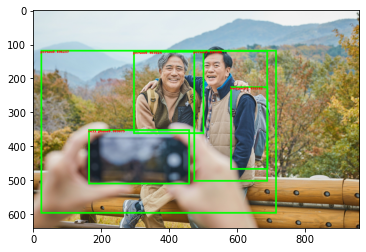

In [128]:
# x=206; y=18 ; width= 96 ; height=178

from PIL import Image
from PIL import ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def pil_draw_rect(image, point1, point2):
    draw = ImageDraw.Draw(image)
    draw.rectangle((point1, point2), outline=(0, 255, 0), width=5)
    draw.text(point1, name, fill='red', fontsize=100)

    return image

image = Image.open('data/imgs/1.jpg')

for i in range(len(df)):
    cnt = i
    name = df.iloc[cnt,0] + str(df.iloc[cnt,1])
    x = df.iloc[cnt,2]
    y = df.iloc[cnt,3]
    width = df.iloc[cnt,4]
    height = df.iloc[cnt,5]

    image = pil_draw_rect(image, (x, y), (x+width, y+height))

plt.imshow(np.array(image))
plt.show()


In [97]:
cnt=0
name = df.iloc[cnt,0] + str(df.iloc[cnt,1])
x = df.iloc[cnt,2]
y = df.iloc[cnt,3]
width = df.iloc[cnt,4]
height = df.iloc[cnt,5]


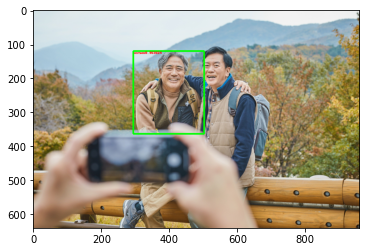

In [118]:
# x=206; y=18 ; width= 96 ; height=178

from PIL import Image
from PIL import ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def pil_draw_line(image, point1, point2):
    d_fill = (0,255,0)
    d_width = 5
    draw = ImageDraw.Draw(image)
    draw.text(point1, name, fill='red', fontsize=100)
    draw.line((point1, point1[0]+point2[2], point1[1]), fill=d_fill, width=d_width)
    draw.line((x, y, x, y+height), fill=d_fill, width=d_width)
    draw.line((x+width, y+height, x, y+height), fill=d_fill, width=d_width)
    draw.line((x+width, y+height, x+width, y), fill=d_fill, width=d_width)

image = Image.open('data/imgs/1.jpg')

image = pil_draw_rect(image, (x, y), (width, height))
plt.imshow(np.array(image))
plt.show()


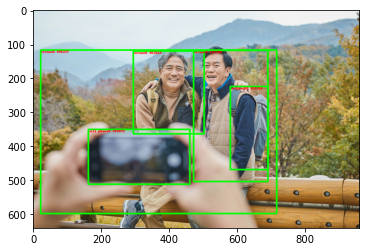

In [121]:
for i in range(len(df)):
    cnt = i
    name = df.iloc[cnt,0] + str(df.iloc[cnt,1])
    x = df.iloc[cnt,2]
    y = df.iloc[cnt,3]
    width = df.iloc[cnt,4]
    height = df.iloc[cnt,5]

    draw = ImageDraw.Draw(image)
    draw.line((x, y, x+width, y), fill=(0,255,0), width=5)
    draw.text((x,y), name, fill='red')
    draw.line((x, y, x, y+height), fill=(0,255,0), width=5)
    draw.line((x+width, y+height, x, y+height), fill=(0,255,0), width=5)
    draw.line((x+width, y+height, x+width, y), fill=(0,255,0), width=5)


plt.imshow(np.array(image))
plt.show()

In [ ]:
# 참고 코드한줄로 만들기

# x, h, w, y = 80, 90, 100, 105
# img_small2 = img.resize((300, 300))
# draw = ImageDraw.Draw(img_small2)
# draw.line([(x+30, y), (x-10, y+h), (x+w-20, y+h+50), (x+w+40, y+47), (x+30, y)], fill="red", width=2)
# img_small2